## Vehicle Classification

Dataset Link: https://www.kaggle.com/datasets/marquis03/vehicle-classification

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-classification/val/SUV/cfc368c752895985a7d4bf3cb64d630c.jpg
/kaggle/input/vehicle-classification/val/SUV/c9ef804987778a3e0590e5e501f38b56.jpg
/kaggle/input/vehicle-classification/val/SUV/3ebdcb08e93555fead046ddabddd3350.jpg
/kaggle/input/vehicle-classification/val/SUV/3037a9c243c43addf623e9609a09515c.jpg
/kaggle/input/vehicle-classification/val/SUV/3bbb37d5a6e3167683f57196ace2b4cd.jpg
/kaggle/input/vehicle-classification/val/SUV/b3f97064fed7b66b154dc84b68d79716.jpg
/kaggle/input/vehicle-classification/val/SUV/b0d111a7c355e47d040ba1f2282c04cb.jpg
/kaggle/input/vehicle-classification/val/SUV/37d329f08d105885c3e5d658921356c6.jpg
/kaggle/input/vehicle-classification/val/SUV/757431282570c269922ad34645e4eb99.jpg
/kaggle/input/vehicle-classification/val/SUV/4cc32ad3e0e67676c4ec9fec34fa64fe.jpg
/kaggle/input/vehicle-classification/val/SUV/1a0f819be4dce50a5372679b36c2777f.jpg
/kaggle/input/vehicle-classification/val/SUV/0ea9451a8de9cf7581835ccb20940174.jpg
/kaggle/input/ve

In [2]:
import os

# Define the path to the vehicle classification dataset
path = '/kaggle/input/vehicle-classification/train'

# Initialize an empty dictionary to store the folder names and their counts
folder_counts = {}

# Iterate over the folders in the specified path
for folder in os.listdir(path):
    # Ensure the folder is a directory (not a file)
    if os.path.isdir(os.path.join(path, folder)):
        # Count the number of files in the folder
        count = len([file for file in os.listdir(os.path.join(path, folder)) if os.path.isfile(os.path.join(path, folder, file))])
        # Store the folder name and count in the dictionary
        folder_counts[folder] = count

# Print the folder names and their counts
for folder, count in folder_counts.items():
    print(f"Folder: {folder}, Count: {count}")

Folder: SUV, Count: 140
Folder: bus, Count: 140
Folder: truck, Count: 140
Folder: heavy truck, Count: 140
Folder: family sedan, Count: 140
Folder: fire engine, Count: 140
Folder: jeep, Count: 140
Folder: racing car, Count: 140
Folder: taxi, Count: 140
Folder: minibus, Count: 140


Here our dataset contain three main folders that are train , test & val.

Train and Val are used for the training and validation to build the model . these two folders contain ten types of vehicles named folders and each folder contains there respective vehicle images ..

And the test folder contains the random images only , they are not classified ,so we can use them to test the model by giving new images 

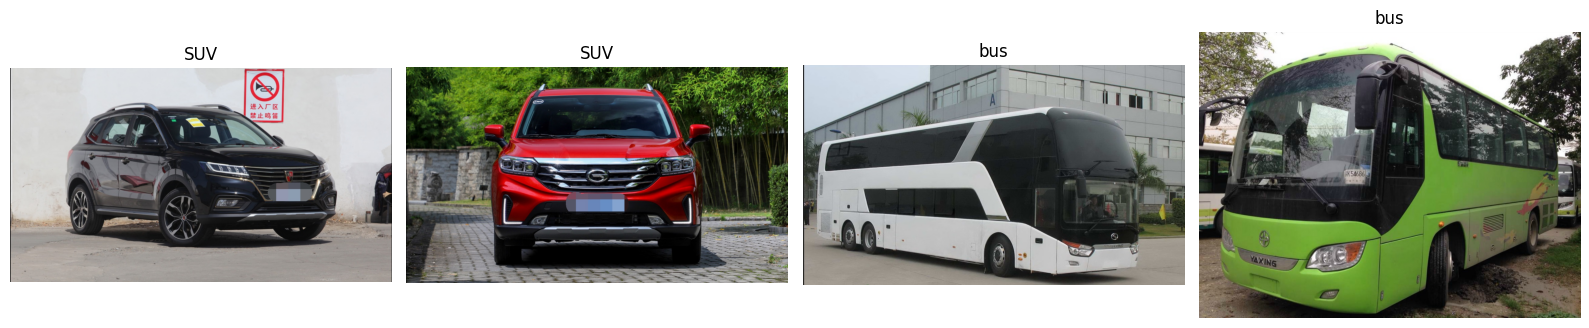

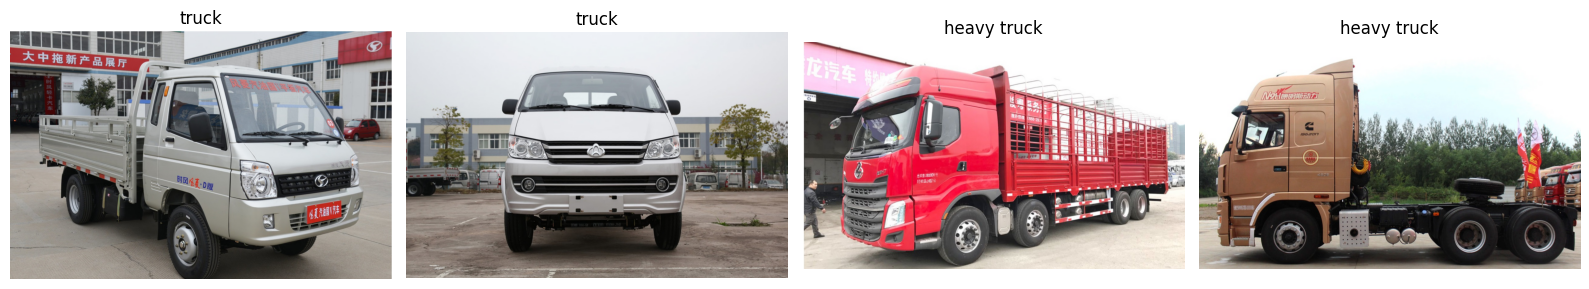

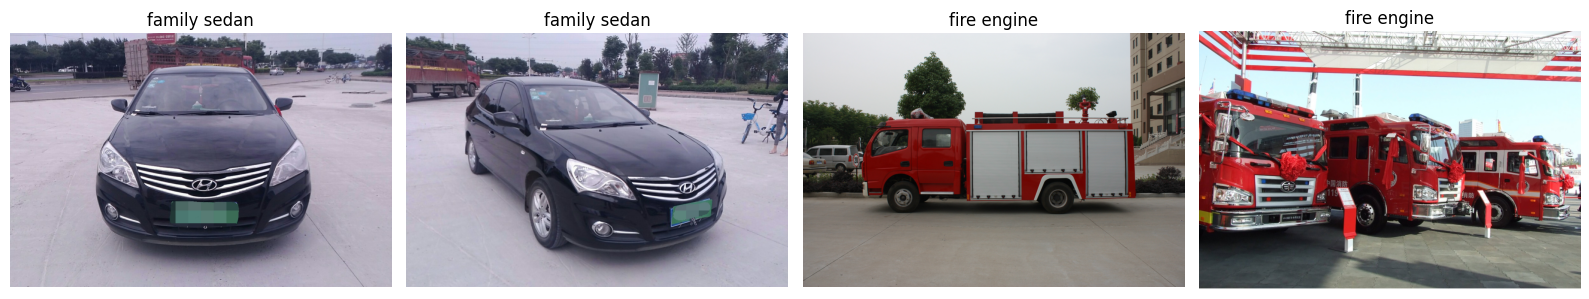

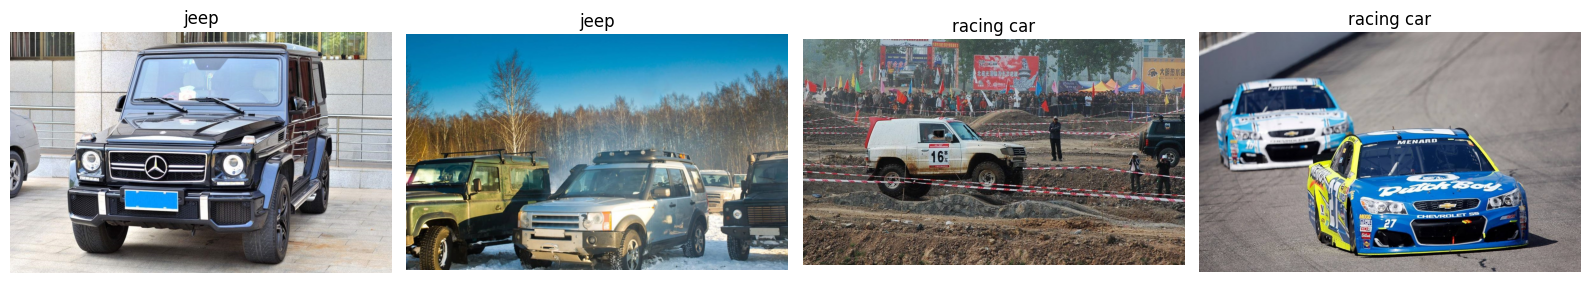

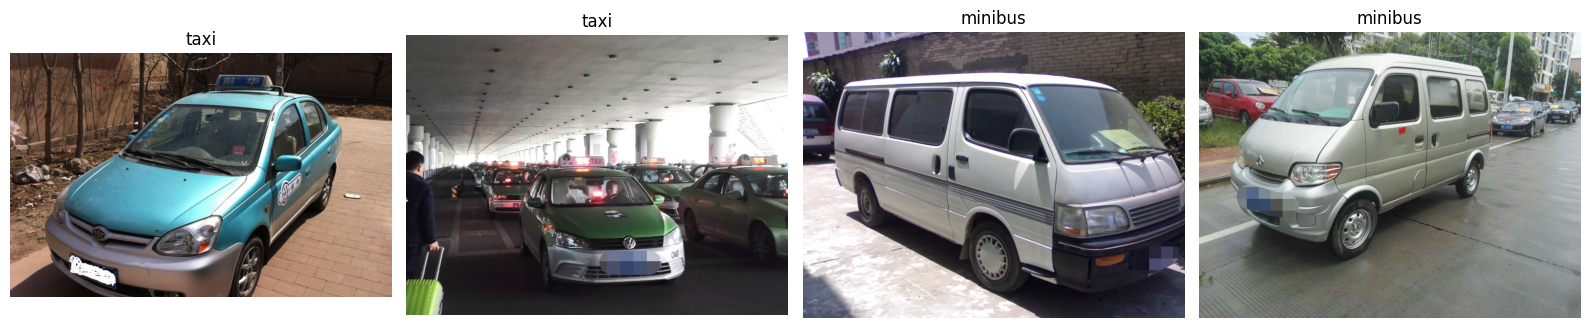

In [5]:
import os
import matplotlib.pyplot as plt


# Get a list of all the folders
folders = os.listdir(path)

# Iterate over the folders in pairs
for i in range(0, len(folders), 2):
    # Get the current and next folder
    folder1 = folders[i]
    folder2 = folders[i+1] if i+1 < len(folders) else None
    
    # Create a figure with 4 subplots per row
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    
    # Visualize two images from the first folder
    for j, file in enumerate(os.listdir(os.path.join(path, folder1))):
        if j < 2:
            img_path = os.path.join(path, folder1, file)
            img = plt.imread(img_path)
            axes[j].imshow(img)
            axes[j].set_title(folder1)
            axes[j].axis('off')
    
    # Visualize two images from the second folder (if it exists)
    if folder2:
        for j, file in enumerate(os.listdir(os.path.join(path, folder2))):
            if j < 2:
                img_path = os.path.join(path, folder2, file)
                img = plt.imread(img_path)
                axes[j+2].imshow(img)
                axes[j+2].set_title(folder2)
                axes[j+2].axis('off')
    
    plt.tight_layout()
    plt.show()

Above are some images from the dataset .

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Paths to training and validation datasets
train_dir = '/kaggle/input/vehicle-classification/train'
valid_dir = '/kaggle/input/vehicle-classification/val'


we use both train and val folders for the model building

1. **Import Libraries**:
   - `os`: This library is used for interacting with the operating system. It provides a way to use operating system dependent functionality.
   - `tensorflow as tf`: TensorFlow is a popular open-source software library for numerical computation, particularly well-suited and fine-tuned for large-scale Machine Learning (ML) and Deep Learning (DL) tasks.
   - `ImageDataGenerator` and `ModelCheckpoint` from `tensorflow.keras`: These are used for data preprocessing and model saving, respectively.
   - `Sequential`, `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Dropout` from `tensorflow.keras.layers`: These are used to build the neural network model.

2. **Paths to Training and Validation Datasets**:
   - `train_dir` and `valid_dir` are set to the paths of the training and validation datasets, respectively. These paths are specific to the Kaggle competition 'Vehicle Classification' and are used to load the images from these directories.
s (`Dropout`) are used to prevent overfitting.


In [ ]:

# Image data generators for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

# Load images in batches
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=32, class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(150, 150),
                                                    batch_size=32, class_mode='categorical')



1. **Data Augmentation**: we use data augmentation to randomly transform the training images, making the model more robust to different variations of the same image.

2. **Batching**: The code loads the training and validation images in batches of 32 images each, which helps the model learn more efficiently.

3. **Normalization**: The images are normalized by rescaling the pixel values to the range [0, 1], which helps the model learn more effectively.

4. **Class Labels**: The class labels are in categorical format, which means each class is represented by a binary vector where the index of the class is 1 and the rest are 0.

In [ ]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for 10 types of vehicles
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


1. **Sequential API**:
   - The model is defined using the `Sequential` API from Keras, which allows you to create a model by stacking layers on top of each other.

2. **Convolutional Layers**:
   - The model consists of several convolutional layers (`Conv2D`):
     - The first layer has 32 filters of size 3x3, with ReLU activation and an input shape of (150, 150, 3), which means the input images are 150x150 pixels with 3 color channels (RGB).
     - The second and third layers have 64 and 128 filters, respectively, with ReLU activation.
     - These layers are followed by max-pooling layers (`MaxPooling2D`) with a pool size of 2x2.

3. **Flatten and Dense Layers**:
   - After the convolutional and pooling layers, the output is flattened using the `Flatten` layer.
   - The flattened output is then passed through a dense layer (`Dense`) with 512 units and ReLU activation.
   - This is followed by a dropout layer (`Dropout`) with a rate of 0.5 to prevent overfitting.
   - The final layer is a dense layer (`Dense`) with 10 units (corresponding to the 10 classes of vehicles) and a softmax activation function.


2024-06-20 06:49:40.583945: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 06:49:40.584094: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 06:49:40.740441: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 1400 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.0989 - loss: 2.6521 - val_accuracy: 0.1650 - val_loss: 2.2297
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.1794 - loss: 2.2004 - val_accuracy: 0.2200 - val_loss: 1.9629
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.2332 - loss: 2.0591 - val_accuracy: 0.4000 - val_loss: 1.7308
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.2939 - loss: 1.9821 - val_accuracy: 0.3450 - val_loss: 1.8568
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.3472 - loss: 1.8577 - val_accuracy: 0.3450 - val_loss: 2.2918
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.3288 - loss: 1.8938 - val_accuracy: 0.4450 - val_loss: 1.6432
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.3712 - loss: 1.7459 - val_accuracy: 0.5050 - val_loss: 1.4711
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.3947 - loss: 1.7162 - val_accuracy: 0.4800 - val_loss: 1.5873
Epo

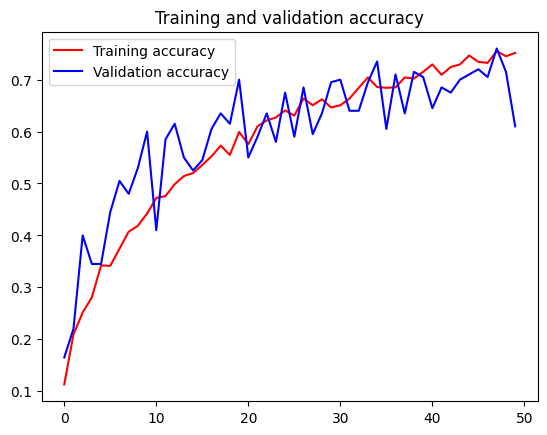

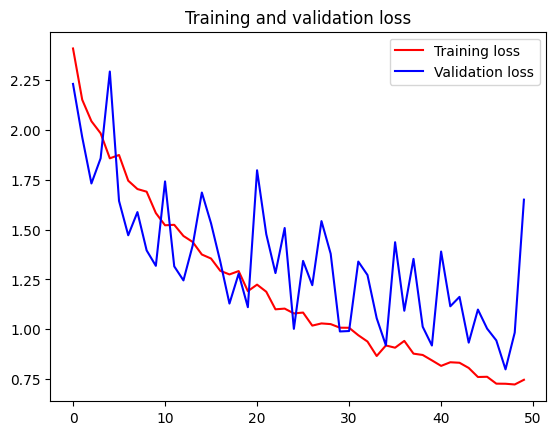

In [1]:


# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(train_generator, epochs=30, validation_data=valid_generator,
                    callbacks=[early_stopping, model_checkpoint])

# Plot training and validation accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


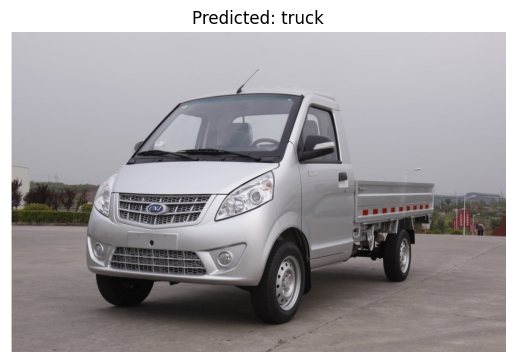

The predicted class is: truck


In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def classify_and_show_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict the class
    prediction = model.predict(img_array)
    class_indices = {v: k for k, v in train_generator.class_indices.items()}
    predicted_class = class_indices[np.argmax(prediction)]

    # Display the image with the predicted class
    img = image.load_img(img_path)  # Reload the image to display it
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

    return predicted_class

# Example usage
img_path = '/kaggle/input/vehicle-classification/test/0930125614a5dbbb8e5c5ee450586a13.jpg'
predicted_class = classify_and_show_image(img_path)
print(f'The predicted class is: {predicted_class}')


In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [ ]:
def classify_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict the class
    prediction = model.predict(img_array)
    class_indices = {v: k for k, v in train_generator.class_indices.items()}
    predicted_class = class_indices[np.argmax(prediction)]
    
    return predicted_class

In [ ]:
def display_predictions(test_dir, num_images=20, images_per_row=4):
    # Get a list of all image paths
    all_images = []
    for root, _, files in os.walk(test_dir):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                all_images.append(os.path.join(root, file))

    # Check if there are enough images
    if len(all_images) < num_images:
        print(f"Not enough images in the directory. Found {len(all_images)} images.")
        return

    # Randomly select a subset of images
    selected_images = random.sample(all_images, num_images)
    
    # Print selected images for debugging
    print("Selected images:", selected_images)

    # Create a figure to display the images
    fig, axes = plt.subplots(num_images // images_per_row, images_per_row, figsize=(20, 10))
    axes = axes.flatten()

    for ax, img_path in zip(axes, selected_images):
        try:
            predicted_class = classify_image(img_path)
            img = image.load_img(img_path)
            ax.imshow(img)
            ax.set_title(f'Predicted: {predicted_class}')
            ax.axis('off')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            ax.axis('off')

    plt.tight_layout()
    plt.show()

Selected images: ['/kaggle/input/vehicle-classification/test/45242c276cd516adb93561503a2f6ed7.jpg', '/kaggle/input/vehicle-classification/test/5f89e7991ccee7a66676616c8fc145e1.jpg', '/kaggle/input/vehicle-classification/test/3acbdbd78d3270f626fa9eac8c182bb3.jpg', '/kaggle/input/vehicle-classification/test/adaf348564dd71ae2c318378d5f60051.jpg', '/kaggle/input/vehicle-classification/test/a0a1c93b23171e19bcef8fa6949e5116.jpg', '/kaggle/input/vehicle-classification/test/124db00b777b961fa8ca28fc05d7c130.jpg', '/kaggle/input/vehicle-classification/test/f2cd6c805f084ce28812a62a0a582e7a.jpg', '/kaggle/input/vehicle-classification/test/05a006ebd8667a39988a253b10956bb7.jpg', '/kaggle/input/vehicle-classification/test/91409b182fe012ec4a4ffde63bf4f3e1.jpg', '/kaggle/input/vehicle-classification/test/09bbbd3f758e129a2692844e3b62d5a8.jpg', '/kaggle/input/vehicle-classification/test/7141dc0b260cb428c6c0bcb5e51426fc.jpg', '/kaggle/input/vehicle-classification/test/e19d91dc4bb0619953da8ef809dd6727.jpg'

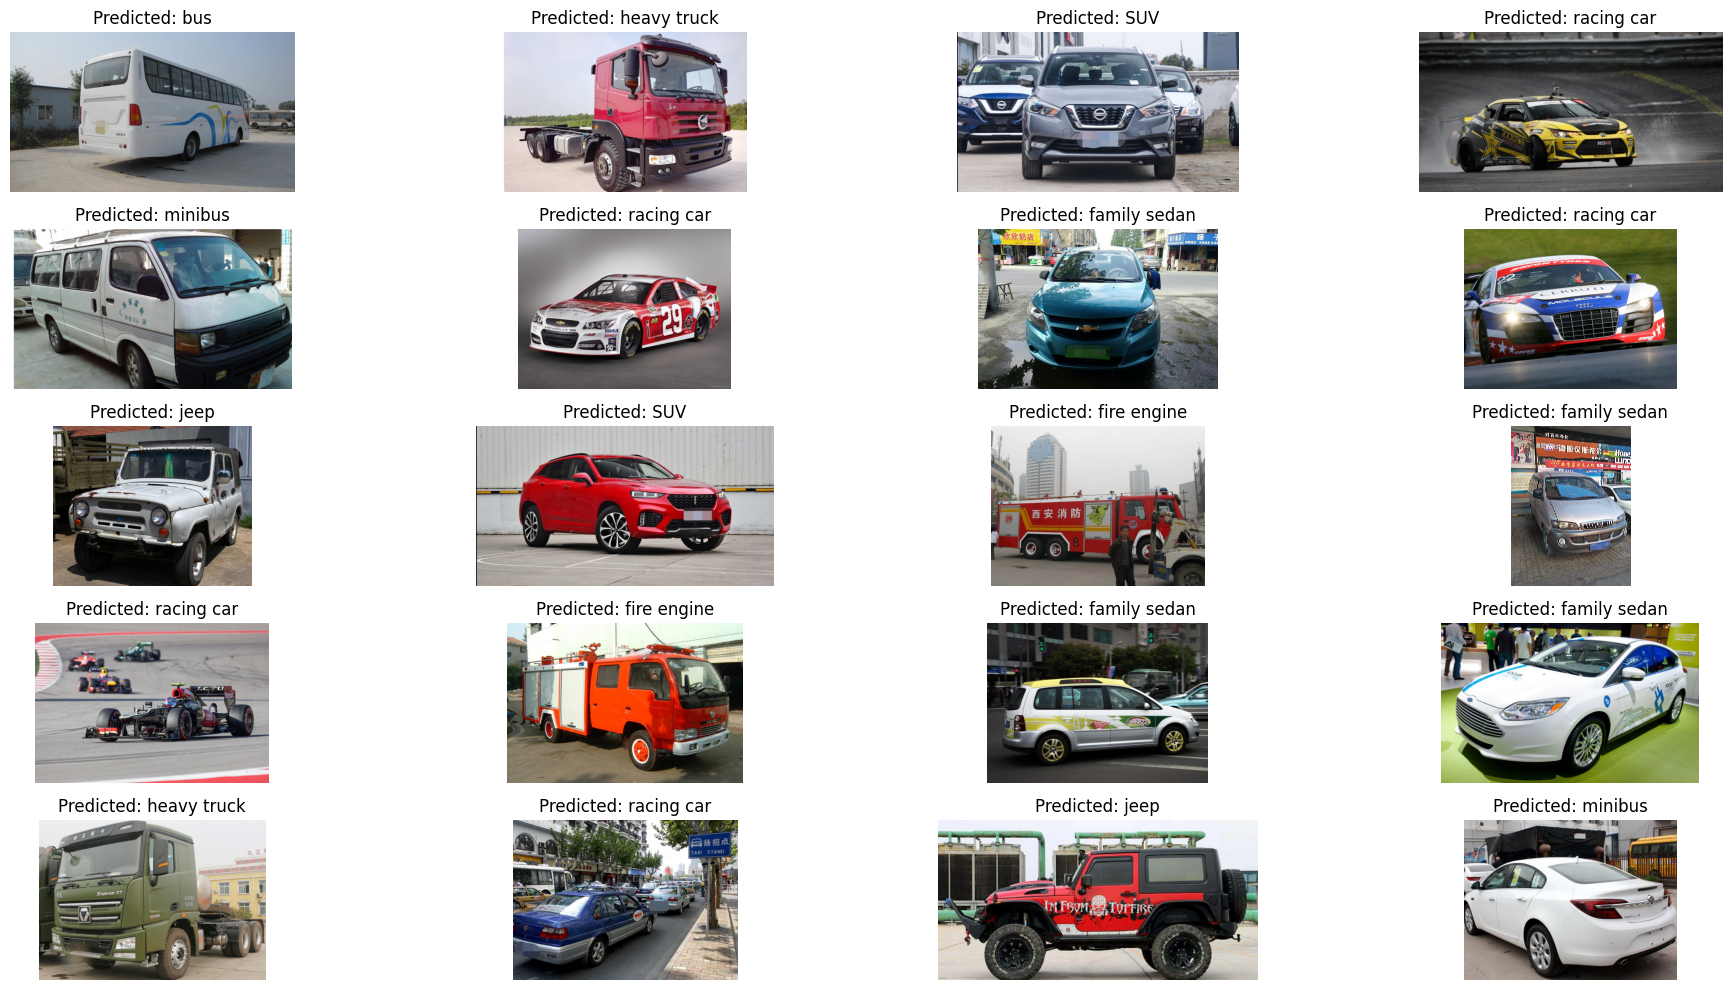

In [12]:
# Example usage
test_dir = '/kaggle/input/vehicle-classification/test'
display_predictions(test_dir)

If we observe each vehicle here , it predicted every car perfectly . it may be predicts some vehicles wrong . so if you want to increase its accuracy then we have to give more training data to the model which obviously takes more time to train without gpu